In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
import os 

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

import warnings

sys.path.append(os.path.abspath("../"))

from src.Components.Data_ingestion import TypeFile

In [2]:
from src.Components.Data_transformation import traintestsplit

In [3]:
file_path = "/home/amine/Desktop/Projects/endtoend_DS_withdeploy/Notebook/Data/stud.csv"

In [4]:
df = TypeFile().Ingest(file_path)

In [5]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
x_train, x_test, y_train, y_test = traintestsplit().DataTra(file_path)

In [7]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((750, 19), (250, 19), (750,), (250,))

In [8]:
Models = {
    
    "Decision Tree": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "Lasso": Lasso(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "LinearRegression": LinearRegression(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "Ridge": Ridge(),
    "svm": SVR()
    
}

In [9]:
def compute_loss(y_true, y_pred):
    
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    return r2, mae ,mse

In [10]:
r2_list = []

In [11]:
for name, model in Models.items():
    
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)
        
    print(f'\n Model {name} ==> ')
    print('\n Model Performance on Trainig set')
    
    r2, mae, mse = compute_loss(y_train, y_train_pred)
    print(f'\n r square: {r2}, mean absolute error: {mae}, mean square error: {mse}')
    
    print('\n Model Performance on Testing set')
    
    r2, mae, mse = compute_loss(y_test, y_pred)
    print(f'\n r square: {r2}, mean absolute error: {mae}, mean square error: {mse}')
    
    r2_list.append(r2)
    


 Model Decision Tree ==> 

 Model Performance on Trainig set

 r square: 0.9999885726649873, mean absolute error: 0.0026666666666666666, mean square error: 0.0026666666666666666

 Model Performance on Testing set

 r square: 0.6753131370566248, mean absolute error: 6.664, mean square error: 70.752



 Model RandomForestRegressor ==> 

 Model Performance on Trainig set

 r square: 0.9771600294552765, mean absolute error: 1.8276671111111111, mean square error: 5.329903083407407

 Model Performance on Testing set

 r square: 0.8391884845787692, mean absolute error: 4.788240000000001, mean square error: 35.0421826

 Model Lasso ==> 

 Model Performance on Trainig set

 r square: 0.8133535448734424, mean absolute error: 5.21231229306112, mean square error: 43.555551647413225

 Model Performance on Testing set

 r square: 0.7897578230919235, mean absolute error: 5.3501729572090335, mean square error: 45.81353974643073

 Model AdaBoostRegressor ==> 

 Model Performance on Trainig set

 r square: 0.8501063207138333, mean absolute error: 4.7928467469796106, mean square error: 34.97897608257587

 Model Performance on Testing set

 r square: 0.7939936340869564, mean absolute error: 5.350047322649561, mean square error: 44.89052088202773

 Model LinearRegression ==> 

 Model Performance on Tr

In [12]:
pd.DataFrame(list(zip(Models, r2_list)), columns=['Model', 'R2 Square']).sort_values(by=['R2 Square'], ascending=False)

,Model,R2 Square
8,Ridge,0.852477
4,LinearRegression,0.852204
1,RandomForestRegressor,0.839188
7,CatBoostRegressor,0.837211
6,XGBRegressor,0.801200
3,AdaBoostRegressor,0.793994
2,Lasso,0.789758
5,KNeighborsRegressor,0.775863
9,svm,0.770577
0,Decision Tree,0.675313


In [13]:
model = Ridge(fit_intercept= True)

model.fit(x_train, y_train)

y_p = model.predict(x_test)

score = r2_score(y_test, y_p) * 100

print(f'{score=}%')

score=85.24773137581975%


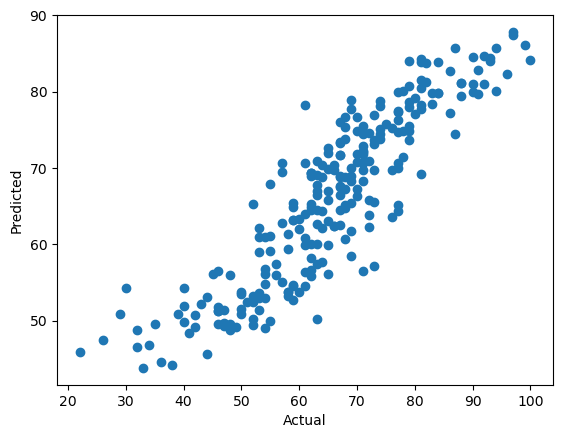

In [14]:
plt.scatter(y_test, y_pred, )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='math_score'>

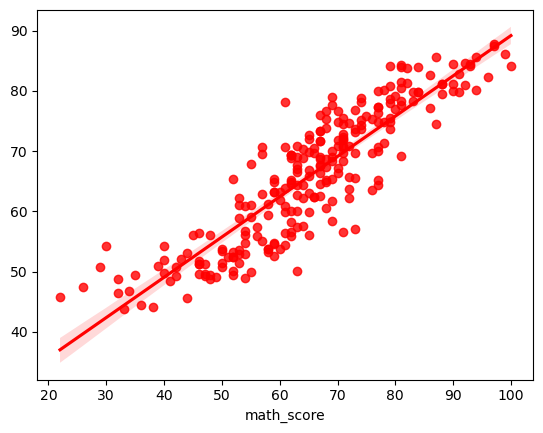

In [15]:
sns.regplot(x= y_test, y= y_pred, color='r')

In [16]:
pd = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_p, 'Deffirence':y_test - y_p})

In [17]:
pd

,Actual value,Predicted value,Deffirence
993,62,62.368880,-0.368880
859,87,75.231574,11.768426
298,40,48.592588,-8.592588
553,77,66.383568,10.616432
672,69,69.646723,-0.646723
...,...,...,...
462,71,72.663662,-1.663662
356,63,66.887122,-3.887122
2,90,84.729805,5.270195
478,55,58.912522,-3.912522
